In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import attila_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
versions = ['v1', 'v2']
def my_read_csv(v):
    fpath = '/Users/jonesa7/CTNS/results/2022-01-14-top-drugs/ranked-drugs-' + v + '.csv'
    df = pd.read_csv(fpath, index_col='drug_chembl_id')
    return(df)

v1, v2 = [my_read_csv(v) for v in versions]
aggrank = pd.merge(v1[['aggregate rank']], v2[['aggregate rank']], how='right', on='drug_chembl_id', suffixes=('_v1', '_v2'))
aggrank = aggrank.dropna()
aggrank = aggrank.astype({'aggregate rank_v1': 'int64', 'aggregate rank_v2': 'int64'})
aggrank['change'] = aggrank.apply(lambda row: row['aggregate rank_v1'] - row['aggregate rank_v2'], axis=1)
aggrank

,aggregate rank_v1,aggregate rank_v2,change
drug_chembl_id,,,
CHEMBL477772,2,1,1
CHEMBL491473,1,2,-1
CHEMBL939,9,3,6
CHEMBL446452,3,4,-1
CHEMBL296306,4,5,-1
...,...,...,...
CHEMBL486819,596,587,9
CHEMBL54349,601,590,11
CHEMBL972,600,591,9


['named-figure/rank-change-v1-v2.png', 'named-figure/rank-change-v1-v2.pdf']

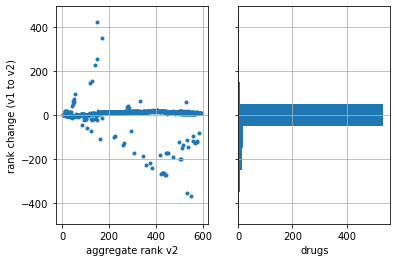

In [3]:
fig, ax = plt.subplots(1, 2, sharey=True)
ax[0].scatter(x='aggregate rank_v2', y='change', data=aggrank, marker='.')
ax[0].grid()
ax[0].set_xlabel('aggregate rank v2')
ax[0].set_ylabel('rank change (v1 to v2)')
ax[1].hist(aggrank.change, bins=np.arange(-450, 550, step=100), orientation='horizontal')
ax[1].set_xlabel('drugs')
ax[1].grid()
attila_utils.savefig(fig, 'rank-change-v1-v2')

In [4]:
%connect_info

{
  "shell_port": 56245,
  "iopub_port": 56246,
  "stdin_port": 56247,
  "control_port": 56249,
  "hb_port": 56248,
  "ip": "127.0.0.1",
  "key": "92b168a0-c429619eaed8b308254d6195",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-d2ac38d9-63c4-4998-bac4-01eb45d6c658.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
